In [2]:
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Activation

In [25]:
#1.데이터셋 생성하기
(xTrain,yTrain),(xTest,yTest)=mnist.load_data()

In [26]:
xTrain=xTrain.reshape(60000,784).astype('float32')/255.0
xTest=xTest.reshape(10000,784).astype('float32')/255.0

In [15]:
yTrain
yTrain=np_utils.to_categorical(yTrain)
yTest=np_utils.to_categorical(yTest)

In [27]:
#2. 모델 구성
model=Sequential()
model.add(Dense(units=64, input_dim=28*28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [30]:
#3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [31]:
#4. 모델 학습
hist=model.fit(xTrain, yTrain, epochs=5, batch_size=32)
#batch_size:몇개의 샘플로 가중치를 갱신할것인가

ValueError: Error when checking target: expected dense_4 to have shape (10,) but got array with shape (1,)

In [20]:
print(hist.history['loss'])
print(hist.history['accuracy'])

[2.300696055730184, 2.3001652893066407, 2.2998135913848876, 2.299497727839152, 2.2991317680358887]
[0.11421666, 0.11236667, 0.11236667, 0.11236667, 0.11236667]


In [21]:
#6. 모델 평가
res=model.evaluate(xTest, yTest, batch_size=32)
print(res)

10000/10000 [==============================] - 0s 20us/step
[2.124321017074585, 0.30070000886917114]


In [24]:
#모델 예측
xhat=xTest[0:1]
yhat=model.predict(xhat)
print(yhat)

[[0.11023965 0.10862794 0.10155054 0.06691364 0.16018663 0.05072782
  0.06391407 0.13546948 0.09696775 0.10540249]]


In [32]:
import numpy as np
np.random.seed(3)

In [63]:
(xTrain,yTrain),(xTest,yTest)=mnist.load_data()

In [64]:
xVal=xTrain[50000:]
yVal=yTrain[50000:]
xTrain=xTrain[:50000]
yTrain=yTrain[:50000]

In [65]:
xTrain=xTrain.reshape(50000,784).astype('float32')/255.0
xVal=xVal.reshape(10000,784).astype('float32')/255.0
xTest=xTest.reshape(10000,784).astype('float32')/255.0

In [66]:
#훈련, 검증 데이터 선택
tri=np.random.choice(50000,700)
vri=np.random.choice(10000,300)

In [67]:
xTrain=xTrain[tri] #700건
yTrain=yTrain[tri]
xVal=xVal[vri]  #300건
yVal=yVal[vri]

In [68]:
yTrain=np_utils.to_categorical(yTrain)
yVal=np_utils.to_categorical(yVal)
yTest=np_utils.to_categorical(yTest)

In [69]:
model=Sequential()
model.add(Dense(input_dim=28*28,units=2,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [70]:
model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])

In [46]:
hist=model.fit(xTrain,yTrain,epochs=3000, batch_size=10, validation_data=(xVal,yVal))

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 206us/step - loss: 2.2598 - accuracy: 0.1586 - val_loss: 2.1913 - val_accuracy: 0.2467
Epoch 2/3000
700/700 [==============================] - 0s 106us/step - loss: 2.1648 - accuracy: 0.2129 - val_loss: 2.1128 - val_accuracy: 0.2767
Epoch 3/3000
700/700 [==============================] - 0s 106us/step - loss: 2.0967 - accuracy: 0.2286 - val_loss: 2.0536 - val_accuracy: 0.2533
Epoch 4/3000
700/700 [==============================] - 0s 104us/step - loss: 2.0443 - accuracy: 0.2357 - val_loss: 2.0035 - val_accuracy: 0.2567
Epoch 5/3000
700/700 [==============================] - 0s 110us/step - loss: 1.9968 - accuracy: 0.2414 - val_loss: 1.9612 - val_accuracy: 0.2500
Epoch 6/3000
700/700 [==============================] - 0s 93us/step - loss: 1.9563 - accuracy: 0.2614 - val_loss: 1.9214 - val_accuracy: 0.2467
Epoch 7/3000
700/700 [==============================] - 0s 90us/step - loss: 1.

Epoch 57/3000
700/700 [==============================] - 0s 91us/step - loss: 1.3165 - accuracy: 0.5171 - val_loss: 1.3996 - val_accuracy: 0.5100
Epoch 58/3000
700/700 [==============================] - 0s 87us/step - loss: 1.3075 - accuracy: 0.5429 - val_loss: 1.3951 - val_accuracy: 0.4900
Epoch 59/3000
700/700 [==============================] - 0s 99us/step - loss: 1.3032 - accuracy: 0.5371 - val_loss: 1.3907 - val_accuracy: 0.5133
Epoch 60/3000
700/700 [==============================] - 0s 106us/step - loss: 1.2955 - accuracy: 0.5414 - val_loss: 1.3827 - val_accuracy: 0.4967
Epoch 61/3000
700/700 [==============================] - 0s 111us/step - loss: 1.2893 - accuracy: 0.5386 - val_loss: 1.3795 - val_accuracy: 0.4967
Epoch 62/3000
700/700 [==============================] - 0s 109us/step - loss: 1.2825 - accuracy: 0.5371 - val_loss: 1.3829 - val_accuracy: 0.4767
Epoch 63/3000
700/700 [==============================] - 0s 103us/step - loss: 1.2754 - accuracy: 0.5329 - val_loss: 1.38

Epoch 113/3000
700/700 [==============================] - 0s 89us/step - loss: 1.0709 - accuracy: 0.6071 - val_loss: 1.3345 - val_accuracy: 0.5233
Epoch 114/3000
700/700 [==============================] - 0s 99us/step - loss: 1.0683 - accuracy: 0.6043 - val_loss: 1.3374 - val_accuracy: 0.5267
Epoch 115/3000
700/700 [==============================] - 0s 116us/step - loss: 1.0647 - accuracy: 0.6057 - val_loss: 1.3391 - val_accuracy: 0.5200
Epoch 116/3000
700/700 [==============================] - 0s 104us/step - loss: 1.0642 - accuracy: 0.6129 - val_loss: 1.3327 - val_accuracy: 0.5167
Epoch 117/3000
700/700 [==============================] - 0s 96us/step - loss: 1.0582 - accuracy: 0.6243 - val_loss: 1.3402 - val_accuracy: 0.5167
Epoch 118/3000
700/700 [==============================] - 0s 97us/step - loss: 1.0588 - accuracy: 0.6143 - val_loss: 1.3396 - val_accuracy: 0.5167
Epoch 119/3000
700/700 [==============================] - 0s 93us/step - loss: 1.0553 - accuracy: 0.6243 - val_loss:

700/700 [==============================] - 0s 96us/step - loss: 0.9570 - accuracy: 0.6686 - val_loss: 1.3475 - val_accuracy: 0.5367
Epoch 169/3000
700/700 [==============================] - 0s 110us/step - loss: 0.9536 - accuracy: 0.6486 - val_loss: 1.3519 - val_accuracy: 0.5133
Epoch 170/3000
700/700 [==============================] - 0s 110us/step - loss: 0.9524 - accuracy: 0.6671 - val_loss: 1.3549 - val_accuracy: 0.5167
Epoch 171/3000
700/700 [==============================] - 0s 107us/step - loss: 0.9506 - accuracy: 0.6714 - val_loss: 1.3540 - val_accuracy: 0.5200
Epoch 172/3000
700/700 [==============================] - 0s 97us/step - loss: 0.9482 - accuracy: 0.6729 - val_loss: 1.3563 - val_accuracy: 0.5200
Epoch 173/3000
700/700 [==============================] - 0s 103us/step - loss: 0.9470 - accuracy: 0.6643 - val_loss: 1.3527 - val_accuracy: 0.5300
Epoch 174/3000
700/700 [==============================] - 0s 94us/step - loss: 0.9472 - accuracy: 0.6643 - val_loss: 1.3556 - val

700/700 [==============================] - 0s 101us/step - loss: 0.8681 - accuracy: 0.7086 - val_loss: 1.3641 - val_accuracy: 0.5500
Epoch 224/3000
700/700 [==============================] - 0s 94us/step - loss: 0.8673 - accuracy: 0.7186 - val_loss: 1.3609 - val_accuracy: 0.5467
Epoch 225/3000
700/700 [==============================] - 0s 91us/step - loss: 0.8636 - accuracy: 0.7114 - val_loss: 1.3674 - val_accuracy: 0.5400
Epoch 226/3000
700/700 [==============================] - 0s 97us/step - loss: 0.8643 - accuracy: 0.7086 - val_loss: 1.3649 - val_accuracy: 0.5400
Epoch 227/3000
700/700 [==============================] - 0s 107us/step - loss: 0.8644 - accuracy: 0.7071 - val_loss: 1.3667 - val_accuracy: 0.5367
Epoch 228/3000
700/700 [==============================] - 0s 109us/step - loss: 0.8608 - accuracy: 0.7143 - val_loss: 1.3710 - val_accuracy: 0.5367
Epoch 229/3000
700/700 [==============================] - 0s 103us/step - loss: 0.8569 - accuracy: 0.7214 - val_loss: 1.3686 - val

Epoch 279/3000
700/700 [==============================] - 0s 96us/step - loss: 0.7837 - accuracy: 0.7586 - val_loss: 1.3776 - val_accuracy: 0.5600
Epoch 280/3000
700/700 [==============================] - 0s 104us/step - loss: 0.7791 - accuracy: 0.7543 - val_loss: 1.3671 - val_accuracy: 0.5400
Epoch 281/3000
700/700 [==============================] - 0s 109us/step - loss: 0.7793 - accuracy: 0.7586 - val_loss: 1.3739 - val_accuracy: 0.5567
Epoch 282/3000
700/700 [==============================] - 0s 94us/step - loss: 0.7787 - accuracy: 0.7600 - val_loss: 1.3744 - val_accuracy: 0.5567
Epoch 283/3000
700/700 [==============================] - 0s 97us/step - loss: 0.7760 - accuracy: 0.7643 - val_loss: 1.3869 - val_accuracy: 0.5400
Epoch 284/3000
700/700 [==============================] - 0s 97us/step - loss: 0.7763 - accuracy: 0.7600 - val_loss: 1.3738 - val_accuracy: 0.5533
Epoch 285/3000
700/700 [==============================] - 0s 96us/step - loss: 0.7731 - accuracy: 0.7657 - val_loss:

700/700 [==============================] - 0s 94us/step - loss: 0.7181 - accuracy: 0.7771 - val_loss: 1.4126 - val_accuracy: 0.5500
Epoch 335/3000
700/700 [==============================] - 0s 96us/step - loss: 0.7197 - accuracy: 0.7857 - val_loss: 1.4135 - val_accuracy: 0.5467
Epoch 336/3000
700/700 [==============================] - 0s 100us/step - loss: 0.7178 - accuracy: 0.7757 - val_loss: 1.4216 - val_accuracy: 0.5700
Epoch 337/3000
700/700 [==============================] - 0s 104us/step - loss: 0.7157 - accuracy: 0.7843 - val_loss: 1.4155 - val_accuracy: 0.5500
Epoch 338/3000
700/700 [==============================] - 0s 107us/step - loss: 0.7161 - accuracy: 0.7829 - val_loss: 1.4229 - val_accuracy: 0.5600
Epoch 339/3000
700/700 [==============================] - 0s 101us/step - loss: 0.7122 - accuracy: 0.7757 - val_loss: 1.4135 - val_accuracy: 0.5633
Epoch 340/3000
700/700 [==============================] - 0s 107us/step - loss: 0.7126 - accuracy: 0.7729 - val_loss: 1.4241 - va

700/700 [==============================] - 0s 93us/step - loss: 0.6718 - accuracy: 0.7900 - val_loss: 1.4639 - val_accuracy: 0.5667
Epoch 390/3000
700/700 [==============================] - 0s 97us/step - loss: 0.6703 - accuracy: 0.7900 - val_loss: 1.4569 - val_accuracy: 0.5533
Epoch 391/3000
700/700 [==============================] - 0s 93us/step - loss: 0.6687 - accuracy: 0.7900 - val_loss: 1.4645 - val_accuracy: 0.5800
Epoch 392/3000
700/700 [==============================] - 0s 93us/step - loss: 0.6677 - accuracy: 0.8014 - val_loss: 1.4565 - val_accuracy: 0.5667
Epoch 393/3000
700/700 [==============================] - 0s 93us/step - loss: 0.6689 - accuracy: 0.7943 - val_loss: 1.4689 - val_accuracy: 0.5733
Epoch 394/3000
700/700 [==============================] - 0s 96us/step - loss: 0.6655 - accuracy: 0.7971 - val_loss: 1.4765 - val_accuracy: 0.5800
Epoch 395/3000
700/700 [==============================] - 0s 93us/step - loss: 0.6670 - accuracy: 0.7929 - val_loss: 1.4622 - val_acc

Epoch 445/3000
700/700 [==============================] - 0s 103us/step - loss: 0.6316 - accuracy: 0.8086 - val_loss: 1.5294 - val_accuracy: 0.5367
Epoch 446/3000
700/700 [==============================] - 0s 106us/step - loss: 0.6344 - accuracy: 0.8086 - val_loss: 1.5189 - val_accuracy: 0.5733
Epoch 447/3000
700/700 [==============================] - 0s 109us/step - loss: 0.6320 - accuracy: 0.8157 - val_loss: 1.5223 - val_accuracy: 0.5600
Epoch 448/3000
700/700 [==============================] - 0s 99us/step - loss: 0.6295 - accuracy: 0.8200 - val_loss: 1.5187 - val_accuracy: 0.5433
Epoch 449/3000
700/700 [==============================] - 0s 91us/step - loss: 0.6311 - accuracy: 0.8014 - val_loss: 1.5168 - val_accuracy: 0.5433
Epoch 450/3000
700/700 [==============================] - 0s 93us/step - loss: 0.6293 - accuracy: 0.8029 - val_loss: 1.5210 - val_accuracy: 0.5433
Epoch 451/3000
700/700 [==============================] - 0s 93us/step - loss: 0.6304 - accuracy: 0.8171 - val_loss

700/700 [==============================] - 0s 106us/step - loss: 0.6015 - accuracy: 0.8329 - val_loss: 1.5776 - val_accuracy: 0.5533
Epoch 501/3000
700/700 [==============================] - 0s 103us/step - loss: 0.5999 - accuracy: 0.8314 - val_loss: 1.5727 - val_accuracy: 0.5633
Epoch 502/3000
700/700 [==============================] - 0s 93us/step - loss: 0.6021 - accuracy: 0.8229 - val_loss: 1.5765 - val_accuracy: 0.5533
Epoch 503/3000
700/700 [==============================] - 0s 101us/step - loss: 0.5993 - accuracy: 0.8314 - val_loss: 1.5781 - val_accuracy: 0.5467
Epoch 504/3000
700/700 [==============================] - 0s 94us/step - loss: 0.5999 - accuracy: 0.8343 - val_loss: 1.5729 - val_accuracy: 0.5433
Epoch 505/3000
700/700 [==============================] - 0s 119us/step - loss: 0.5997 - accuracy: 0.8229 - val_loss: 1.5805 - val_accuracy: 0.5533
Epoch 506/3000
700/700 [==============================] - 0s 104us/step - loss: 0.5987 - accuracy: 0.8286 - val_loss: 1.5801 - va

Epoch 556/3000
700/700 [==============================] - 0s 104us/step - loss: 0.5749 - accuracy: 0.8443 - val_loss: 1.6437 - val_accuracy: 0.5567
Epoch 557/3000
700/700 [==============================] - 0s 96us/step - loss: 0.5733 - accuracy: 0.8400 - val_loss: 1.6393 - val_accuracy: 0.5567
Epoch 558/3000
700/700 [==============================] - 0s 93us/step - loss: 0.5724 - accuracy: 0.8429 - val_loss: 1.6431 - val_accuracy: 0.5400
Epoch 559/3000
700/700 [==============================] - 0s 91us/step - loss: 0.5733 - accuracy: 0.8429 - val_loss: 1.6433 - val_accuracy: 0.5567
Epoch 560/3000
700/700 [==============================] - 0s 94us/step - loss: 0.5714 - accuracy: 0.8414 - val_loss: 1.6463 - val_accuracy: 0.5567
Epoch 561/3000
700/700 [==============================] - 0s 93us/step - loss: 0.5709 - accuracy: 0.8443 - val_loss: 1.6510 - val_accuracy: 0.5467
Epoch 562/3000
700/700 [==============================] - 0s 93us/step - loss: 0.5713 - accuracy: 0.8400 - val_loss: 

700/700 [==============================] - 0s 104us/step - loss: 0.5468 - accuracy: 0.8557 - val_loss: 1.6898 - val_accuracy: 0.5533
Epoch 612/3000
700/700 [==============================] - 0s 96us/step - loss: 0.5472 - accuracy: 0.8600 - val_loss: 1.6893 - val_accuracy: 0.5500
Epoch 613/3000
700/700 [==============================] - 0s 94us/step - loss: 0.5462 - accuracy: 0.8571 - val_loss: 1.6979 - val_accuracy: 0.5567
Epoch 614/3000
700/700 [==============================] - 0s 99us/step - loss: 0.5475 - accuracy: 0.8586 - val_loss: 1.7008 - val_accuracy: 0.5567
Epoch 615/3000
700/700 [==============================] - 0s 101us/step - loss: 0.5460 - accuracy: 0.8614 - val_loss: 1.7000 - val_accuracy: 0.5533
Epoch 616/3000
700/700 [==============================] - 0s 107us/step - loss: 0.5453 - accuracy: 0.8543 - val_loss: 1.7006 - val_accuracy: 0.5533
Epoch 617/3000
700/700 [==============================] - 0s 97us/step - loss: 0.5441 - accuracy: 0.8586 - val_loss: 1.7050 - val_

Epoch 667/3000
700/700 [==============================] - 0s 93us/step - loss: 0.5241 - accuracy: 0.8614 - val_loss: 1.7560 - val_accuracy: 0.5500
Epoch 668/3000
700/700 [==============================] - 0s 91us/step - loss: 0.5248 - accuracy: 0.8643 - val_loss: 1.7608 - val_accuracy: 0.5400
Epoch 669/3000
700/700 [==============================] - 0s 86us/step - loss: 0.5257 - accuracy: 0.8614 - val_loss: 1.7548 - val_accuracy: 0.5500
Epoch 670/3000
700/700 [==============================] - 0s 91us/step - loss: 0.5241 - accuracy: 0.8629 - val_loss: 1.7511 - val_accuracy: 0.5467
Epoch 671/3000
700/700 [==============================] - 0s 91us/step - loss: 0.5238 - accuracy: 0.8629 - val_loss: 1.7669 - val_accuracy: 0.5500
Epoch 672/3000
700/700 [==============================] - 0s 96us/step - loss: 0.5238 - accuracy: 0.8629 - val_loss: 1.7579 - val_accuracy: 0.5533
Epoch 673/3000
700/700 [==============================] - 0s 97us/step - loss: 0.5225 - accuracy: 0.8600 - val_loss: 1

700/700 [==============================] - 0s 97us/step - loss: 0.5003 - accuracy: 0.8657 - val_loss: 1.8404 - val_accuracy: 0.5433
Epoch 723/3000
700/700 [==============================] - 0s 101us/step - loss: 0.4989 - accuracy: 0.8700 - val_loss: 1.8389 - val_accuracy: 0.5367
Epoch 724/3000
700/700 [==============================] - 0s 117us/step - loss: 0.4990 - accuracy: 0.8714 - val_loss: 1.8403 - val_accuracy: 0.5433
Epoch 725/3000
700/700 [==============================] - 0s 107us/step - loss: 0.4982 - accuracy: 0.8671 - val_loss: 1.8366 - val_accuracy: 0.5467
Epoch 726/3000
700/700 [==============================] - 0s 97us/step - loss: 0.4979 - accuracy: 0.8729 - val_loss: 1.8370 - val_accuracy: 0.5433
Epoch 727/3000
700/700 [==============================] - 0s 94us/step - loss: 0.4981 - accuracy: 0.8700 - val_loss: 1.8475 - val_accuracy: 0.5433
Epoch 728/3000
700/700 [==============================] - 0s 91us/step - loss: 0.4973 - accuracy: 0.8700 - val_loss: 1.8434 - val_

Epoch 778/3000
700/700 [==============================] - 0s 96us/step - loss: 0.4785 - accuracy: 0.8771 - val_loss: 1.9079 - val_accuracy: 0.5233
Epoch 779/3000
700/700 [==============================] - 0s 103us/step - loss: 0.4785 - accuracy: 0.8771 - val_loss: 1.9137 - val_accuracy: 0.5333
Epoch 780/3000
700/700 [==============================] - 0s 106us/step - loss: 0.4785 - accuracy: 0.8729 - val_loss: 1.9156 - val_accuracy: 0.5333
Epoch 781/3000
700/700 [==============================] - 0s 107us/step - loss: 0.4761 - accuracy: 0.8786 - val_loss: 1.9257 - val_accuracy: 0.5267
Epoch 782/3000
700/700 [==============================] - 0s 96us/step - loss: 0.4771 - accuracy: 0.8743 - val_loss: 1.9146 - val_accuracy: 0.5300
Epoch 783/3000
700/700 [==============================] - 0s 91us/step - loss: 0.4759 - accuracy: 0.8786 - val_loss: 1.9234 - val_accuracy: 0.5333
Epoch 784/3000
700/700 [==============================] - 0s 100us/step - loss: 0.4766 - accuracy: 0.8714 - val_los

700/700 [==============================] - 0s 91us/step - loss: 0.4615 - accuracy: 0.8829 - val_loss: 1.9804 - val_accuracy: 0.5267
Epoch 834/3000
700/700 [==============================] - 0s 90us/step - loss: 0.4624 - accuracy: 0.8786 - val_loss: 2.0002 - val_accuracy: 0.5200
Epoch 835/3000
700/700 [==============================] - 0s 93us/step - loss: 0.4603 - accuracy: 0.8857 - val_loss: 1.9799 - val_accuracy: 0.5267
Epoch 836/3000
700/700 [==============================] - 0s 96us/step - loss: 0.4607 - accuracy: 0.8800 - val_loss: 1.9750 - val_accuracy: 0.5300
Epoch 837/3000
700/700 [==============================] - 0s 94us/step - loss: 0.4599 - accuracy: 0.8800 - val_loss: 1.9765 - val_accuracy: 0.5200
Epoch 838/3000
700/700 [==============================] - 0s 114us/step - loss: 0.4596 - accuracy: 0.8814 - val_loss: 1.9755 - val_accuracy: 0.5267
Epoch 839/3000
700/700 [==============================] - 0s 113us/step - loss: 0.4602 - accuracy: 0.8800 - val_loss: 1.9895 - val_a

Epoch 889/3000
700/700 [==============================] - 0s 96us/step - loss: 0.4458 - accuracy: 0.8857 - val_loss: 2.0359 - val_accuracy: 0.5133
Epoch 890/3000
700/700 [==============================] - 0s 101us/step - loss: 0.4450 - accuracy: 0.8786 - val_loss: 2.0447 - val_accuracy: 0.5133
Epoch 891/3000
700/700 [==============================] - 0s 100us/step - loss: 0.4440 - accuracy: 0.8814 - val_loss: 2.0385 - val_accuracy: 0.5233
Epoch 892/3000
700/700 [==============================] - 0s 103us/step - loss: 0.4452 - accuracy: 0.8857 - val_loss: 2.0604 - val_accuracy: 0.5100
Epoch 893/3000
700/700 [==============================] - 0s 99us/step - loss: 0.4447 - accuracy: 0.8900 - val_loss: 2.0464 - val_accuracy: 0.5067
Epoch 894/3000
700/700 [==============================] - 0s 94us/step - loss: 0.4447 - accuracy: 0.8886 - val_loss: 2.0551 - val_accuracy: 0.5000
Epoch 895/3000
700/700 [==============================] - 0s 93us/step - loss: 0.4452 - accuracy: 0.8857 - val_loss

700/700 [==============================] - 0s 106us/step - loss: 0.4324 - accuracy: 0.8900 - val_loss: 2.1083 - val_accuracy: 0.5067
Epoch 945/3000
700/700 [==============================] - 0s 103us/step - loss: 0.4323 - accuracy: 0.8886 - val_loss: 2.0951 - val_accuracy: 0.5067
Epoch 946/3000
700/700 [==============================] - 0s 104us/step - loss: 0.4322 - accuracy: 0.8886 - val_loss: 2.1101 - val_accuracy: 0.5000
Epoch 947/3000
700/700 [==============================] - 0s 106us/step - loss: 0.4308 - accuracy: 0.8914 - val_loss: 2.1118 - val_accuracy: 0.5000
Epoch 948/3000
700/700 [==============================] - 0s 104us/step - loss: 0.4314 - accuracy: 0.8886 - val_loss: 2.1267 - val_accuracy: 0.5067
Epoch 949/3000
700/700 [==============================] - 0s 96us/step - loss: 0.4314 - accuracy: 0.8914 - val_loss: 2.1240 - val_accuracy: 0.5067
Epoch 950/3000
700/700 [==============================] - 0s 106us/step - loss: 0.4306 - accuracy: 0.8914 - val_loss: 2.1221 - v

Epoch 1000/3000
700/700 [==============================] - 0s 109us/step - loss: 0.4202 - accuracy: 0.8929 - val_loss: 2.1659 - val_accuracy: 0.4933
Epoch 1001/3000
700/700 [==============================] - 0s 94us/step - loss: 0.4181 - accuracy: 0.8929 - val_loss: 2.1677 - val_accuracy: 0.4933
Epoch 1002/3000
700/700 [==============================] - 0s 93us/step - loss: 0.4189 - accuracy: 0.8943 - val_loss: 2.1807 - val_accuracy: 0.5000
Epoch 1003/3000
700/700 [==============================] - 0s 90us/step - loss: 0.4187 - accuracy: 0.8957 - val_loss: 2.1851 - val_accuracy: 0.5000
Epoch 1004/3000
700/700 [==============================] - 0s 93us/step - loss: 0.4187 - accuracy: 0.8971 - val_loss: 2.1832 - val_accuracy: 0.4900
Epoch 1005/3000
700/700 [==============================] - 0s 96us/step - loss: 0.4174 - accuracy: 0.8929 - val_loss: 2.1874 - val_accuracy: 0.4900
Epoch 1006/3000
700/700 [==============================] - 0s 106us/step - loss: 0.4191 - accuracy: 0.8943 - va

700/700 [==============================] - 0s 103us/step - loss: 0.4087 - accuracy: 0.9014 - val_loss: 2.2504 - val_accuracy: 0.4900
Epoch 1056/3000
700/700 [==============================] - 0s 103us/step - loss: 0.4086 - accuracy: 0.9000 - val_loss: 2.2601 - val_accuracy: 0.4967
Epoch 1057/3000
700/700 [==============================] - 0s 94us/step - loss: 0.4076 - accuracy: 0.9014 - val_loss: 2.2513 - val_accuracy: 0.4833
Epoch 1058/3000
700/700 [==============================] - 0s 91us/step - loss: 0.4079 - accuracy: 0.8986 - val_loss: 2.2439 - val_accuracy: 0.4833
Epoch 1059/3000
700/700 [==============================] - 0s 94us/step - loss: 0.4079 - accuracy: 0.9014 - val_loss: 2.2465 - val_accuracy: 0.4867
Epoch 1060/3000
700/700 [==============================] - 0s 90us/step - loss: 0.4070 - accuracy: 0.8971 - val_loss: 2.2580 - val_accuracy: 0.4833
Epoch 1061/3000
700/700 [==============================] - 0s 91us/step - loss: 0.4063 - accuracy: 0.9043 - val_loss: 2.2488 -

700/700 [==============================] - 0s 104us/step - loss: 0.3979 - accuracy: 0.9043 - val_loss: 2.3152 - val_accuracy: 0.4900
Epoch 1111/3000
700/700 [==============================] - 0s 96us/step - loss: 0.3985 - accuracy: 0.9014 - val_loss: 2.2953 - val_accuracy: 0.4933
Epoch 1112/3000
700/700 [==============================] - 0s 94us/step - loss: 0.3986 - accuracy: 0.9057 - val_loss: 2.3017 - val_accuracy: 0.4900
Epoch 1113/3000
700/700 [==============================] - 0s 106us/step - loss: 0.3972 - accuracy: 0.9043 - val_loss: 2.3033 - val_accuracy: 0.4767
Epoch 1114/3000
700/700 [==============================] - 0s 106us/step - loss: 0.3969 - accuracy: 0.9000 - val_loss: 2.3079 - val_accuracy: 0.4800
Epoch 1115/3000
700/700 [==============================] - 0s 97us/step - loss: 0.3971 - accuracy: 0.9029 - val_loss: 2.3065 - val_accuracy: 0.4800
Epoch 1116/3000
700/700 [==============================] - 0s 120us/step - loss: 0.3972 - accuracy: 0.9000 - val_loss: 2.3246

700/700 [==============================] - 0s 93us/step - loss: 0.3882 - accuracy: 0.9057 - val_loss: 2.3756 - val_accuracy: 0.4900
Epoch 1166/3000
700/700 [==============================] - 0s 106us/step - loss: 0.3870 - accuracy: 0.9086 - val_loss: 2.3596 - val_accuracy: 0.4933
Epoch 1167/3000
700/700 [==============================] - 0s 101us/step - loss: 0.3878 - accuracy: 0.9057 - val_loss: 2.3637 - val_accuracy: 0.4867
Epoch 1168/3000
700/700 [==============================] - 0s 94us/step - loss: 0.3874 - accuracy: 0.9057 - val_loss: 2.3749 - val_accuracy: 0.4833
Epoch 1169/3000
700/700 [==============================] - 0s 93us/step - loss: 0.3881 - accuracy: 0.9071 - val_loss: 2.3741 - val_accuracy: 0.4900
Epoch 1170/3000
700/700 [==============================] - 0s 96us/step - loss: 0.3871 - accuracy: 0.9071 - val_loss: 2.3652 - val_accuracy: 0.4800
Epoch 1171/3000
700/700 [==============================] - 0s 94us/step - loss: 0.3865 - accuracy: 0.9100 - val_loss: 2.3667 -

700/700 [==============================] - 0s 86us/step - loss: 0.3792 - accuracy: 0.9071 - val_loss: 2.4288 - val_accuracy: 0.4767
Epoch 1221/3000
700/700 [==============================] - 0s 89us/step - loss: 0.3800 - accuracy: 0.9071 - val_loss: 2.4312 - val_accuracy: 0.4800
Epoch 1222/3000
700/700 [==============================] - 0s 89us/step - loss: 0.3785 - accuracy: 0.9100 - val_loss: 2.4333 - val_accuracy: 0.4767
Epoch 1223/3000
700/700 [==============================] - 0s 91us/step - loss: 0.3783 - accuracy: 0.9057 - val_loss: 2.4370 - val_accuracy: 0.4767
Epoch 1224/3000
700/700 [==============================] - 0s 97us/step - loss: 0.3791 - accuracy: 0.9086 - val_loss: 2.4350 - val_accuracy: 0.4767
Epoch 1225/3000
700/700 [==============================] - 0s 103us/step - loss: 0.3794 - accuracy: 0.9071 - val_loss: 2.4447 - val_accuracy: 0.4767
Epoch 1226/3000
700/700 [==============================] - 0s 107us/step - loss: 0.3782 - accuracy: 0.9043 - val_loss: 2.4320 -

700/700 [==============================] - 0s 101us/step - loss: 0.3710 - accuracy: 0.9114 - val_loss: 2.5029 - val_accuracy: 0.4733
Epoch 1276/3000
700/700 [==============================] - 0s 109us/step - loss: 0.3706 - accuracy: 0.9114 - val_loss: 2.4965 - val_accuracy: 0.4767
Epoch 1277/3000
700/700 [==============================] - 0s 109us/step - loss: 0.3701 - accuracy: 0.9086 - val_loss: 2.4995 - val_accuracy: 0.4767
Epoch 1278/3000
700/700 [==============================] - 0s 103us/step - loss: 0.3708 - accuracy: 0.9100 - val_loss: 2.5014 - val_accuracy: 0.4800
Epoch 1279/3000
700/700 [==============================] - 0s 106us/step - loss: 0.3708 - accuracy: 0.9114 - val_loss: 2.5012 - val_accuracy: 0.4867
Epoch 1280/3000
700/700 [==============================] - 0s 106us/step - loss: 0.3704 - accuracy: 0.9100 - val_loss: 2.4913 - val_accuracy: 0.4767
Epoch 1281/3000
700/700 [==============================] - 0s 106us/step - loss: 0.3702 - accuracy: 0.9100 - val_loss: 2.5

700/700 [==============================] - 0s 107us/step - loss: 0.3636 - accuracy: 0.9071 - val_loss: 2.5620 - val_accuracy: 0.4733
Epoch 1331/3000
700/700 [==============================] - 0s 101us/step - loss: 0.3633 - accuracy: 0.9100 - val_loss: 2.5611 - val_accuracy: 0.4700
Epoch 1332/3000
700/700 [==============================] - 0s 107us/step - loss: 0.3629 - accuracy: 0.9100 - val_loss: 2.5661 - val_accuracy: 0.4733
Epoch 1333/3000
700/700 [==============================] - 0s 113us/step - loss: 0.3633 - accuracy: 0.9114 - val_loss: 2.5628 - val_accuracy: 0.4767
Epoch 1334/3000
700/700 [==============================] - 0s 119us/step - loss: 0.3626 - accuracy: 0.9114 - val_loss: 2.5689 - val_accuracy: 0.4733
Epoch 1335/3000
700/700 [==============================] - 0s 93us/step - loss: 0.3632 - accuracy: 0.9100 - val_loss: 2.5654 - val_accuracy: 0.4767
Epoch 1336/3000
700/700 [==============================] - 0s 87us/step - loss: 0.3624 - accuracy: 0.9114 - val_loss: 2.559

700/700 [==============================] - 0s 86us/step - loss: 0.3558 - accuracy: 0.9114 - val_loss: 2.6237 - val_accuracy: 0.4700
Epoch 1386/3000
700/700 [==============================] - 0s 89us/step - loss: 0.3561 - accuracy: 0.9100 - val_loss: 2.6332 - val_accuracy: 0.4700
Epoch 1387/3000
700/700 [==============================] - 0s 94us/step - loss: 0.3548 - accuracy: 0.9129 - val_loss: 2.6258 - val_accuracy: 0.4633
Epoch 1388/3000
700/700 [==============================] - 0s 94us/step - loss: 0.3553 - accuracy: 0.9114 - val_loss: 2.6211 - val_accuracy: 0.4633
Epoch 1389/3000
700/700 [==============================] - 0s 93us/step - loss: 0.3554 - accuracy: 0.9114 - val_loss: 2.6392 - val_accuracy: 0.4667
Epoch 1390/3000
700/700 [==============================] - 0s 96us/step - loss: 0.3552 - accuracy: 0.9114 - val_loss: 2.6325 - val_accuracy: 0.4733
Epoch 1391/3000
700/700 [==============================] - 0s 91us/step - loss: 0.3545 - accuracy: 0.9129 - val_loss: 2.6387 - v

700/700 [==============================] - 0s 87us/step - loss: 0.3480 - accuracy: 0.9129 - val_loss: 2.6996 - val_accuracy: 0.4600
Epoch 1441/3000
700/700 [==============================] - 0s 91us/step - loss: 0.3504 - accuracy: 0.9114 - val_loss: 2.6986 - val_accuracy: 0.4733
Epoch 1442/3000
700/700 [==============================] - 0s 90us/step - loss: 0.3497 - accuracy: 0.9114 - val_loss: 2.6969 - val_accuracy: 0.4633
Epoch 1443/3000
700/700 [==============================] - 0s 103us/step - loss: 0.3488 - accuracy: 0.9114 - val_loss: 2.6956 - val_accuracy: 0.4700
Epoch 1444/3000
700/700 [==============================] - 0s 110us/step - loss: 0.3500 - accuracy: 0.9114 - val_loss: 2.6871 - val_accuracy: 0.4633
Epoch 1445/3000
700/700 [==============================] - 0s 104us/step - loss: 0.3491 - accuracy: 0.9129 - val_loss: 2.6887 - val_accuracy: 0.4633
Epoch 1446/3000
700/700 [==============================] - 0s 106us/step - loss: 0.3489 - accuracy: 0.9143 - val_loss: 2.6957

700/700 [==============================] - 0s 94us/step - loss: 0.3434 - accuracy: 0.9114 - val_loss: 2.7440 - val_accuracy: 0.4633
Epoch 1496/3000
700/700 [==============================] - 0s 106us/step - loss: 0.3430 - accuracy: 0.9114 - val_loss: 2.7597 - val_accuracy: 0.4633
Epoch 1497/3000
700/700 [==============================] - 0s 107us/step - loss: 0.3432 - accuracy: 0.9129 - val_loss: 2.7555 - val_accuracy: 0.4667
Epoch 1498/3000
700/700 [==============================] - 0s 101us/step - loss: 0.3420 - accuracy: 0.9129 - val_loss: 2.7583 - val_accuracy: 0.4700
Epoch 1499/3000
700/700 [==============================] - 0s 97us/step - loss: 0.3437 - accuracy: 0.9114 - val_loss: 2.7673 - val_accuracy: 0.4633
Epoch 1500/3000
700/700 [==============================] - 0s 91us/step - loss: 0.3418 - accuracy: 0.9129 - val_loss: 2.7584 - val_accuracy: 0.4633
Epoch 1501/3000
700/700 [==============================] - 0s 96us/step - loss: 0.3426 - accuracy: 0.9129 - val_loss: 2.7557 

700/700 [==============================] - 0s 87us/step - loss: 0.3381 - accuracy: 0.9114 - val_loss: 2.8152 - val_accuracy: 0.4633
Epoch 1551/3000
700/700 [==============================] - 0s 91us/step - loss: 0.3372 - accuracy: 0.9129 - val_loss: 2.8215 - val_accuracy: 0.4667
Epoch 1552/3000
700/700 [==============================] - 0s 93us/step - loss: 0.3369 - accuracy: 0.9129 - val_loss: 2.8207 - val_accuracy: 0.4667
Epoch 1553/3000
700/700 [==============================] - 0s 99us/step - loss: 0.3371 - accuracy: 0.9129 - val_loss: 2.8094 - val_accuracy: 0.4633
Epoch 1554/3000
700/700 [==============================] - 0s 104us/step - loss: 0.3372 - accuracy: 0.9143 - val_loss: 2.8276 - val_accuracy: 0.4700
Epoch 1555/3000
700/700 [==============================] - 0s 104us/step - loss: 0.3371 - accuracy: 0.9129 - val_loss: 2.8150 - val_accuracy: 0.4633
Epoch 1556/3000
700/700 [==============================] - 0s 94us/step - loss: 0.3365 - accuracy: 0.9129 - val_loss: 2.8192 -

700/700 [==============================] - 0s 107us/step - loss: 0.3312 - accuracy: 0.9143 - val_loss: 2.8723 - val_accuracy: 0.4633
Epoch 1606/3000
700/700 [==============================] - 0s 110us/step - loss: 0.3327 - accuracy: 0.9129 - val_loss: 2.8792 - val_accuracy: 0.4667
Epoch 1607/3000
700/700 [==============================] - 0s 114us/step - loss: 0.3323 - accuracy: 0.9129 - val_loss: 2.8882 - val_accuracy: 0.4667
Epoch 1608/3000
700/700 [==============================] - 0s 107us/step - loss: 0.3320 - accuracy: 0.9114 - val_loss: 2.8853 - val_accuracy: 0.4600
Epoch 1609/3000
700/700 [==============================] - 0s 116us/step - loss: 0.3319 - accuracy: 0.9143 - val_loss: 2.8815 - val_accuracy: 0.4633
Epoch 1610/3000
700/700 [==============================] - 0s 107us/step - loss: 0.3309 - accuracy: 0.9143 - val_loss: 2.8776 - val_accuracy: 0.4567
Epoch 1611/3000
700/700 [==============================] - 0s 104us/step - loss: 0.3324 - accuracy: 0.9143 - val_loss: 2.8

700/700 [==============================] - 0s 106us/step - loss: 0.3273 - accuracy: 0.9200 - val_loss: 2.9467 - val_accuracy: 0.4700
Epoch 1661/3000
700/700 [==============================] - 0s 93us/step - loss: 0.3267 - accuracy: 0.9157 - val_loss: 2.9405 - val_accuracy: 0.4667
Epoch 1662/3000
700/700 [==============================] - 0s 94us/step - loss: 0.3265 - accuracy: 0.9157 - val_loss: 2.9254 - val_accuracy: 0.4633
Epoch 1663/3000
700/700 [==============================] - 0s 106us/step - loss: 0.3270 - accuracy: 0.9157 - val_loss: 2.9362 - val_accuracy: 0.4633
Epoch 1664/3000
700/700 [==============================] - 0s 97us/step - loss: 0.3273 - accuracy: 0.9143 - val_loss: 2.9409 - val_accuracy: 0.4633
Epoch 1665/3000
700/700 [==============================] - 0s 93us/step - loss: 0.3263 - accuracy: 0.9114 - val_loss: 2.9396 - val_accuracy: 0.4633
Epoch 1666/3000
700/700 [==============================] - 0s 94us/step - loss: 0.3264 - accuracy: 0.9129 - val_loss: 2.9478 -

700/700 [==============================] - 0s 107us/step - loss: 0.3221 - accuracy: 0.9143 - val_loss: 2.9888 - val_accuracy: 0.4700
Epoch 1716/3000
700/700 [==============================] - 0s 101us/step - loss: 0.3219 - accuracy: 0.9171 - val_loss: 2.9881 - val_accuracy: 0.4667
Epoch 1717/3000
700/700 [==============================] - 0s 107us/step - loss: 0.3216 - accuracy: 0.9171 - val_loss: 3.0017 - val_accuracy: 0.4633
Epoch 1718/3000
700/700 [==============================] - 0s 120us/step - loss: 0.3221 - accuracy: 0.9186 - val_loss: 3.0012 - val_accuracy: 0.4700
Epoch 1719/3000
700/700 [==============================] - 0s 104us/step - loss: 0.3224 - accuracy: 0.9157 - val_loss: 3.0011 - val_accuracy: 0.4633
Epoch 1720/3000
700/700 [==============================] - 0s 106us/step - loss: 0.3213 - accuracy: 0.9171 - val_loss: 2.9980 - val_accuracy: 0.4667
Epoch 1721/3000
700/700 [==============================] - 0s 91us/step - loss: 0.3216 - accuracy: 0.9171 - val_loss: 3.01

700/700 [==============================] - 0s 96us/step - loss: 0.3182 - accuracy: 0.9157 - val_loss: 3.0539 - val_accuracy: 0.4733
Epoch 1771/3000
700/700 [==============================] - 0s 104us/step - loss: 0.3175 - accuracy: 0.9214 - val_loss: 3.0640 - val_accuracy: 0.4633
Epoch 1772/3000
700/700 [==============================] - 0s 96us/step - loss: 0.3171 - accuracy: 0.9186 - val_loss: 3.0641 - val_accuracy: 0.4700
Epoch 1773/3000
700/700 [==============================] - 0s 104us/step - loss: 0.3174 - accuracy: 0.9171 - val_loss: 3.0790 - val_accuracy: 0.4600
Epoch 1774/3000
700/700 [==============================] - 0s 104us/step - loss: 0.3171 - accuracy: 0.9200 - val_loss: 3.0807 - val_accuracy: 0.4633
Epoch 1775/3000
700/700 [==============================] - 0s 91us/step - loss: 0.3180 - accuracy: 0.9200 - val_loss: 3.0615 - val_accuracy: 0.4700
Epoch 1776/3000
700/700 [==============================] - 0s 93us/step - loss: 0.3172 - accuracy: 0.9200 - val_loss: 3.0675 

700/700 [==============================] - 0s 110us/step - loss: 0.3138 - accuracy: 0.9186 - val_loss: 3.1006 - val_accuracy: 0.4600
Epoch 1826/3000
700/700 [==============================] - 0s 104us/step - loss: 0.3134 - accuracy: 0.9229 - val_loss: 3.1292 - val_accuracy: 0.4567
Epoch 1827/3000
700/700 [==============================] - 0s 101us/step - loss: 0.3136 - accuracy: 0.9214 - val_loss: 3.1130 - val_accuracy: 0.4700
Epoch 1828/3000
700/700 [==============================] - 0s 93us/step - loss: 0.3132 - accuracy: 0.9214 - val_loss: 3.1287 - val_accuracy: 0.4700
Epoch 1829/3000
700/700 [==============================] - 0s 90us/step - loss: 0.3137 - accuracy: 0.9200 - val_loss: 3.1197 - val_accuracy: 0.4667
Epoch 1830/3000
700/700 [==============================] - 0s 94us/step - loss: 0.3123 - accuracy: 0.9243 - val_loss: 3.1406 - val_accuracy: 0.4567
Epoch 1831/3000
700/700 [==============================] - 0s 107us/step - loss: 0.3130 - accuracy: 0.9200 - val_loss: 3.1248

700/700 [==============================] - 0s 93us/step - loss: 0.3099 - accuracy: 0.9186 - val_loss: 3.1632 - val_accuracy: 0.4600
Epoch 1881/3000
700/700 [==============================] - 0s 96us/step - loss: 0.3093 - accuracy: 0.9214 - val_loss: 3.1677 - val_accuracy: 0.4600
Epoch 1882/3000
700/700 [==============================] - 0s 90us/step - loss: 0.3090 - accuracy: 0.9229 - val_loss: 3.1867 - val_accuracy: 0.4600
Epoch 1883/3000
700/700 [==============================] - 0s 93us/step - loss: 0.3099 - accuracy: 0.9214 - val_loss: 3.1772 - val_accuracy: 0.4633
Epoch 1884/3000
700/700 [==============================] - 0s 96us/step - loss: 0.3096 - accuracy: 0.9214 - val_loss: 3.1783 - val_accuracy: 0.4567
Epoch 1885/3000
700/700 [==============================] - 0s 94us/step - loss: 0.3089 - accuracy: 0.9200 - val_loss: 3.1804 - val_accuracy: 0.4600
Epoch 1886/3000
700/700 [==============================] - 0s 100us/step - loss: 0.3095 - accuracy: 0.9200 - val_loss: 3.1759 - 

700/700 [==============================] - 0s 109us/step - loss: 0.3054 - accuracy: 0.9229 - val_loss: 3.2399 - val_accuracy: 0.4567
Epoch 1936/3000
700/700 [==============================] - 0s 116us/step - loss: 0.3061 - accuracy: 0.9229 - val_loss: 3.2280 - val_accuracy: 0.4633
Epoch 1937/3000
700/700 [==============================] - 0s 111us/step - loss: 0.3051 - accuracy: 0.9214 - val_loss: 3.2101 - val_accuracy: 0.4533
Epoch 1938/3000
700/700 [==============================] - 0s 106us/step - loss: 0.3062 - accuracy: 0.9214 - val_loss: 3.2353 - val_accuracy: 0.4633
Epoch 1939/3000
700/700 [==============================] - 0s 104us/step - loss: 0.3056 - accuracy: 0.9229 - val_loss: 3.2370 - val_accuracy: 0.4633
Epoch 1940/3000
700/700 [==============================] - 0s 106us/step - loss: 0.3056 - accuracy: 0.9214 - val_loss: 3.2285 - val_accuracy: 0.4600
Epoch 1941/3000
700/700 [==============================] - 0s 99us/step - loss: 0.3062 - accuracy: 0.9229 - val_loss: 3.22

700/700 [==============================] - 0s 91us/step - loss: 0.3030 - accuracy: 0.9229 - val_loss: 3.2916 - val_accuracy: 0.4700
Epoch 1991/3000
700/700 [==============================] - 0s 87us/step - loss: 0.3025 - accuracy: 0.9243 - val_loss: 3.2795 - val_accuracy: 0.4667
Epoch 1992/3000
700/700 [==============================] - 0s 90us/step - loss: 0.3018 - accuracy: 0.9229 - val_loss: 3.2864 - val_accuracy: 0.4567
Epoch 1993/3000
700/700 [==============================] - 0s 90us/step - loss: 0.3023 - accuracy: 0.9257 - val_loss: 3.2892 - val_accuracy: 0.4633
Epoch 1994/3000
700/700 [==============================] - 0s 94us/step - loss: 0.3019 - accuracy: 0.9257 - val_loss: 3.2931 - val_accuracy: 0.4600
Epoch 1995/3000
700/700 [==============================] - 0s 94us/step - loss: 0.3018 - accuracy: 0.9229 - val_loss: 3.2912 - val_accuracy: 0.4467
Epoch 1996/3000
700/700 [==============================] - 0s 94us/step - loss: 0.3024 - accuracy: 0.9243 - val_loss: 3.2933 - v

700/700 [==============================] - 0s 93us/step - loss: 0.2988 - accuracy: 0.9257 - val_loss: 3.3254 - val_accuracy: 0.4400
Epoch 2046/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2997 - accuracy: 0.9257 - val_loss: 3.3260 - val_accuracy: 0.4633
Epoch 2047/3000
700/700 [==============================] - 0s 93us/step - loss: 0.2987 - accuracy: 0.9257 - val_loss: 3.3603 - val_accuracy: 0.4533
Epoch 2048/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2991 - accuracy: 0.9257 - val_loss: 3.3547 - val_accuracy: 0.4600
Epoch 2049/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2994 - accuracy: 0.9229 - val_loss: 3.3223 - val_accuracy: 0.4567
Epoch 2050/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2987 - accuracy: 0.9257 - val_loss: 3.3567 - val_accuracy: 0.4600
Epoch 2051/3000
700/700 [==============================] - 0s 99us/step - loss: 0.2994 - accuracy: 0.9257 - val_loss: 3.3363 - v

700/700 [==============================] - 0s 96us/step - loss: 0.2963 - accuracy: 0.9271 - val_loss: 3.3908 - val_accuracy: 0.4567
Epoch 2101/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2961 - accuracy: 0.9271 - val_loss: 3.4003 - val_accuracy: 0.4467
Epoch 2102/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2956 - accuracy: 0.9286 - val_loss: 3.3867 - val_accuracy: 0.4500
Epoch 2103/3000
700/700 [==============================] - 0s 100us/step - loss: 0.2959 - accuracy: 0.9286 - val_loss: 3.3874 - val_accuracy: 0.4600
Epoch 2104/3000
700/700 [==============================] - 0s 109us/step - loss: 0.2959 - accuracy: 0.9257 - val_loss: 3.3876 - val_accuracy: 0.4467
Epoch 2105/3000
700/700 [==============================] - 0s 100us/step - loss: 0.2963 - accuracy: 0.9286 - val_loss: 3.4085 - val_accuracy: 0.4567
Epoch 2106/3000
700/700 [==============================] - 0s 119us/step - loss: 0.2959 - accuracy: 0.9257 - val_loss: 3.392

700/700 [==============================] - 0s 96us/step - loss: 0.2935 - accuracy: 0.9271 - val_loss: 3.4313 - val_accuracy: 0.4567
Epoch 2156/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2923 - accuracy: 0.9286 - val_loss: 3.4585 - val_accuracy: 0.4533
Epoch 2157/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2934 - accuracy: 0.9271 - val_loss: 3.4422 - val_accuracy: 0.4500
Epoch 2158/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2927 - accuracy: 0.9257 - val_loss: 3.4266 - val_accuracy: 0.4500
Epoch 2159/3000
700/700 [==============================] - 0s 93us/step - loss: 0.2924 - accuracy: 0.9286 - val_loss: 3.4567 - val_accuracy: 0.4533
Epoch 2160/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2928 - accuracy: 0.9271 - val_loss: 3.4427 - val_accuracy: 0.4533
Epoch 2161/3000
700/700 [==============================] - 0s 97us/step - loss: 0.2929 - accuracy: 0.9271 - val_loss: 3.4488 - v

700/700 [==============================] - 0s 91us/step - loss: 0.2902 - accuracy: 0.9286 - val_loss: 3.4799 - val_accuracy: 0.4467
Epoch 2211/3000
700/700 [==============================] - 0s 87us/step - loss: 0.2905 - accuracy: 0.9286 - val_loss: 3.4684 - val_accuracy: 0.4433
Epoch 2212/3000
700/700 [==============================] - 0s 86us/step - loss: 0.2906 - accuracy: 0.9257 - val_loss: 3.4795 - val_accuracy: 0.4500
Epoch 2213/3000
700/700 [==============================] - 0s 90us/step - loss: 0.2906 - accuracy: 0.9271 - val_loss: 3.4691 - val_accuracy: 0.4433
Epoch 2214/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2904 - accuracy: 0.9286 - val_loss: 3.4872 - val_accuracy: 0.4567
Epoch 2215/3000
700/700 [==============================] - 0s 97us/step - loss: 0.2902 - accuracy: 0.9286 - val_loss: 3.4786 - val_accuracy: 0.4433
Epoch 2216/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2907 - accuracy: 0.9271 - val_loss: 3.4900 - 

700/700 [==============================] - 0s 106us/step - loss: 0.2880 - accuracy: 0.9271 - val_loss: 3.5298 - val_accuracy: 0.4433
Epoch 2266/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2878 - accuracy: 0.9286 - val_loss: 3.5266 - val_accuracy: 0.4500
Epoch 2267/3000
700/700 [==============================] - 0s 107us/step - loss: 0.2882 - accuracy: 0.9257 - val_loss: 3.5298 - val_accuracy: 0.4433
Epoch 2268/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2878 - accuracy: 0.9286 - val_loss: 3.5073 - val_accuracy: 0.4400
Epoch 2269/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2879 - accuracy: 0.9286 - val_loss: 3.5100 - val_accuracy: 0.4400
Epoch 2270/3000
700/700 [==============================] - 0s 107us/step - loss: 0.2876 - accuracy: 0.9286 - val_loss: 3.5345 - val_accuracy: 0.4467
Epoch 2271/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2875 - accuracy: 0.9271 - val_loss: 3.54

700/700 [==============================] - 0s 104us/step - loss: 0.2858 - accuracy: 0.9271 - val_loss: 3.5824 - val_accuracy: 0.4467
Epoch 2321/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2858 - accuracy: 0.9286 - val_loss: 3.5709 - val_accuracy: 0.4467
Epoch 2322/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2855 - accuracy: 0.9286 - val_loss: 3.5917 - val_accuracy: 0.4433
Epoch 2323/3000
700/700 [==============================] - 0s 111us/step - loss: 0.2851 - accuracy: 0.9271 - val_loss: 3.5753 - val_accuracy: 0.4367
Epoch 2324/3000
700/700 [==============================] - 0s 111us/step - loss: 0.2852 - accuracy: 0.9286 - val_loss: 3.5597 - val_accuracy: 0.4367
Epoch 2325/3000
700/700 [==============================] - 0s 89us/step - loss: 0.2850 - accuracy: 0.9286 - val_loss: 3.5840 - val_accuracy: 0.4433
Epoch 2326/3000
700/700 [==============================] - 0s 107us/step - loss: 0.2842 - accuracy: 0.9286 - val_loss: 3.60

700/700 [==============================] - 0s 109us/step - loss: 0.2834 - accuracy: 0.9286 - val_loss: 3.5926 - val_accuracy: 0.4367
Epoch 2376/3000
700/700 [==============================] - 0s 109us/step - loss: 0.2832 - accuracy: 0.9286 - val_loss: 3.6294 - val_accuracy: 0.4433
Epoch 2377/3000
700/700 [==============================] - 0s 101us/step - loss: 0.2833 - accuracy: 0.9300 - val_loss: 3.6187 - val_accuracy: 0.4367
Epoch 2378/3000
700/700 [==============================] - 0s 99us/step - loss: 0.2832 - accuracy: 0.9286 - val_loss: 3.6264 - val_accuracy: 0.4433
Epoch 2379/3000
700/700 [==============================] - 0s 87us/step - loss: 0.2833 - accuracy: 0.9286 - val_loss: 3.6375 - val_accuracy: 0.4500
Epoch 2380/3000
700/700 [==============================] - 0s 87us/step - loss: 0.2832 - accuracy: 0.9286 - val_loss: 3.6199 - val_accuracy: 0.4367
Epoch 2381/3000
700/700 [==============================] - 0s 89us/step - loss: 0.2834 - accuracy: 0.9271 - val_loss: 3.6400 

700/700 [==============================] - 0s 104us/step - loss: 0.2808 - accuracy: 0.9300 - val_loss: 3.6621 - val_accuracy: 0.4367
Epoch 2431/3000
700/700 [==============================] - 0s 106us/step - loss: 0.2812 - accuracy: 0.9300 - val_loss: 3.6821 - val_accuracy: 0.4467
Epoch 2432/3000
700/700 [==============================] - 0s 101us/step - loss: 0.2810 - accuracy: 0.9286 - val_loss: 3.6856 - val_accuracy: 0.4400
Epoch 2433/3000
700/700 [==============================] - 0s 101us/step - loss: 0.2809 - accuracy: 0.9300 - val_loss: 3.6422 - val_accuracy: 0.4333
Epoch 2434/3000
700/700 [==============================] - 0s 93us/step - loss: 0.2811 - accuracy: 0.9300 - val_loss: 3.6609 - val_accuracy: 0.4367
Epoch 2435/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2807 - accuracy: 0.9286 - val_loss: 3.6876 - val_accuracy: 0.4433
Epoch 2436/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2811 - accuracy: 0.9286 - val_loss: 3.665

700/700 [==============================] - 0s 86us/step - loss: 0.2790 - accuracy: 0.9286 - val_loss: 3.7292 - val_accuracy: 0.4433
Epoch 2486/3000
700/700 [==============================] - 0s 89us/step - loss: 0.2798 - accuracy: 0.9300 - val_loss: 3.7231 - val_accuracy: 0.4433
Epoch 2487/3000
700/700 [==============================] - 0s 93us/step - loss: 0.2795 - accuracy: 0.9286 - val_loss: 3.7018 - val_accuracy: 0.4333
Epoch 2488/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2786 - accuracy: 0.9300 - val_loss: 3.7092 - val_accuracy: 0.4367
Epoch 2489/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2792 - accuracy: 0.9286 - val_loss: 3.7101 - val_accuracy: 0.4367
Epoch 2490/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2790 - accuracy: 0.9286 - val_loss: 3.7264 - val_accuracy: 0.4433
Epoch 2491/3000
700/700 [==============================] - 0s 99us/step - loss: 0.2785 - accuracy: 0.9286 - val_loss: 3.6940 - v

700/700 [==============================] - 0s 114us/step - loss: 0.2771 - accuracy: 0.9286 - val_loss: 3.7490 - val_accuracy: 0.4333
Epoch 2541/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2772 - accuracy: 0.9300 - val_loss: 3.7560 - val_accuracy: 0.4367
Epoch 2542/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2771 - accuracy: 0.9300 - val_loss: 3.7744 - val_accuracy: 0.4467
Epoch 2543/3000
700/700 [==============================] - 0s 91us/step - loss: 0.2766 - accuracy: 0.9286 - val_loss: 3.7697 - val_accuracy: 0.4400
Epoch 2544/3000
700/700 [==============================] - 0s 87us/step - loss: 0.2773 - accuracy: 0.9300 - val_loss: 3.7645 - val_accuracy: 0.4367
Epoch 2545/3000
700/700 [==============================] - 0s 90us/step - loss: 0.2769 - accuracy: 0.9300 - val_loss: 3.7736 - val_accuracy: 0.4400
Epoch 2546/3000
700/700 [==============================] - 0s 87us/step - loss: 0.2766 - accuracy: 0.9286 - val_loss: 3.7661 - 

700/700 [==============================] - 0s 96us/step - loss: 0.2754 - accuracy: 0.9286 - val_loss: 3.7818 - val_accuracy: 0.4367
Epoch 2596/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2754 - accuracy: 0.9300 - val_loss: 3.8090 - val_accuracy: 0.4433
Epoch 2597/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2751 - accuracy: 0.9300 - val_loss: 3.7756 - val_accuracy: 0.4333
Epoch 2598/3000
700/700 [==============================] - 0s 93us/step - loss: 0.2750 - accuracy: 0.9300 - val_loss: 3.8043 - val_accuracy: 0.4400
Epoch 2599/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2751 - accuracy: 0.9300 - val_loss: 3.8032 - val_accuracy: 0.4367
Epoch 2600/3000
700/700 [==============================] - 0s 91us/step - loss: 0.2746 - accuracy: 0.9286 - val_loss: 3.8260 - val_accuracy: 0.4400
Epoch 2601/3000
700/700 [==============================] - 0s 97us/step - loss: 0.2749 - accuracy: 0.9300 - val_loss: 3.8225 - v

700/700 [==============================] - 0s 106us/step - loss: 0.2737 - accuracy: 0.9286 - val_loss: 3.8512 - val_accuracy: 0.4333
Epoch 2651/3000
700/700 [==============================] - 0s 106us/step - loss: 0.2734 - accuracy: 0.9286 - val_loss: 3.8265 - val_accuracy: 0.4333
Epoch 2652/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2732 - accuracy: 0.9300 - val_loss: 3.8544 - val_accuracy: 0.4333
Epoch 2653/3000
700/700 [==============================] - 0s 109us/step - loss: 0.2736 - accuracy: 0.9286 - val_loss: 3.8447 - val_accuracy: 0.4333
Epoch 2654/3000
700/700 [==============================] - 0s 107us/step - loss: 0.2733 - accuracy: 0.9300 - val_loss: 3.8311 - val_accuracy: 0.4333
Epoch 2655/3000
700/700 [==============================] - 0s 109us/step - loss: 0.2736 - accuracy: 0.9300 - val_loss: 3.8446 - val_accuracy: 0.4367
Epoch 2656/3000
700/700 [==============================] - 0s 107us/step - loss: 0.2733 - accuracy: 0.9286 - val_loss: 3.8

700/700 [==============================] - 0s 104us/step - loss: 0.2718 - accuracy: 0.9300 - val_loss: 3.8846 - val_accuracy: 0.4333
Epoch 2706/3000
700/700 [==============================] - 0s 103us/step - loss: 0.2714 - accuracy: 0.9300 - val_loss: 3.8832 - val_accuracy: 0.4333
Epoch 2707/3000
700/700 [==============================] - 0s 106us/step - loss: 0.2715 - accuracy: 0.9300 - val_loss: 3.8678 - val_accuracy: 0.4300
Epoch 2708/3000
700/700 [==============================] - 0s 101us/step - loss: 0.2717 - accuracy: 0.9300 - val_loss: 3.8895 - val_accuracy: 0.4333
Epoch 2709/3000
700/700 [==============================] - 0s 91us/step - loss: 0.2719 - accuracy: 0.9300 - val_loss: 3.8842 - val_accuracy: 0.4333
Epoch 2710/3000
700/700 [==============================] - 0s 93us/step - loss: 0.2713 - accuracy: 0.9300 - val_loss: 3.8746 - val_accuracy: 0.4333
Epoch 2711/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2716 - accuracy: 0.9286 - val_loss: 3.8541

700/700 [==============================] - 0s 94us/step - loss: 0.2703 - accuracy: 0.9300 - val_loss: 3.9116 - val_accuracy: 0.4267
Epoch 2761/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2698 - accuracy: 0.9300 - val_loss: 3.9068 - val_accuracy: 0.4300
Epoch 2762/3000
700/700 [==============================] - 0s 93us/step - loss: 0.2702 - accuracy: 0.9300 - val_loss: 3.9145 - val_accuracy: 0.4300
Epoch 2763/3000
700/700 [==============================] - 0s 91us/step - loss: 0.2699 - accuracy: 0.9300 - val_loss: 3.9267 - val_accuracy: 0.4300
Epoch 2764/3000
700/700 [==============================] - 0s 89us/step - loss: 0.2699 - accuracy: 0.9300 - val_loss: 3.9241 - val_accuracy: 0.4333
Epoch 2765/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2703 - accuracy: 0.9300 - val_loss: 3.9048 - val_accuracy: 0.4300
Epoch 2766/3000
700/700 [==============================] - 0s 90us/step - loss: 0.2698 - accuracy: 0.9300 - val_loss: 3.9208 - v

700/700 [==============================] - 0s 96us/step - loss: 0.2685 - accuracy: 0.9300 - val_loss: 3.9722 - val_accuracy: 0.4333
Epoch 2816/3000
700/700 [==============================] - 0s 101us/step - loss: 0.2684 - accuracy: 0.9300 - val_loss: 3.9328 - val_accuracy: 0.4300
Epoch 2817/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2686 - accuracy: 0.9300 - val_loss: 3.9567 - val_accuracy: 0.4333
Epoch 2818/3000
700/700 [==============================] - 0s 101us/step - loss: 0.2683 - accuracy: 0.9300 - val_loss: 3.9389 - val_accuracy: 0.4267
Epoch 2819/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2685 - accuracy: 0.9300 - val_loss: 3.9568 - val_accuracy: 0.4333
Epoch 2820/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2684 - accuracy: 0.9300 - val_loss: 3.9665 - val_accuracy: 0.4333
Epoch 2821/3000
700/700 [==============================] - 0s 100us/step - loss: 0.2683 - accuracy: 0.9300 - val_loss: 3.9482 

700/700 [==============================] - 0s 90us/step - loss: 0.2667 - accuracy: 0.9300 - val_loss: 3.9873 - val_accuracy: 0.4267
Epoch 2871/3000
700/700 [==============================] - 0s 93us/step - loss: 0.2674 - accuracy: 0.9300 - val_loss: 4.0033 - val_accuracy: 0.4300
Epoch 2872/3000
700/700 [==============================] - 0s 90us/step - loss: 0.2667 - accuracy: 0.9300 - val_loss: 3.9853 - val_accuracy: 0.4233
Epoch 2873/3000
700/700 [==============================] - 0s 90us/step - loss: 0.2669 - accuracy: 0.9300 - val_loss: 4.0147 - val_accuracy: 0.4333
Epoch 2874/3000
700/700 [==============================] - 0s 91us/step - loss: 0.2672 - accuracy: 0.9300 - val_loss: 4.0059 - val_accuracy: 0.4300
Epoch 2875/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2671 - accuracy: 0.9300 - val_loss: 3.9903 - val_accuracy: 0.4267
Epoch 2876/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2666 - accuracy: 0.9300 - val_loss: 3.9920 - v

700/700 [==============================] - 0s 106us/step - loss: 0.2654 - accuracy: 0.9300 - val_loss: 4.0399 - val_accuracy: 0.4267
Epoch 2926/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2654 - accuracy: 0.9300 - val_loss: 4.0394 - val_accuracy: 0.4233
Epoch 2927/3000
700/700 [==============================] - 0s 100us/step - loss: 0.2657 - accuracy: 0.9300 - val_loss: 4.0405 - val_accuracy: 0.4267
Epoch 2928/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2653 - accuracy: 0.9300 - val_loss: 4.0369 - val_accuracy: 0.4267
Epoch 2929/3000
700/700 [==============================] - 0s 110us/step - loss: 0.2654 - accuracy: 0.9300 - val_loss: 4.0351 - val_accuracy: 0.4233
Epoch 2930/3000
700/700 [==============================] - 0s 106us/step - loss: 0.2654 - accuracy: 0.9300 - val_loss: 4.0335 - val_accuracy: 0.4267
Epoch 2931/3000
700/700 [==============================] - 0s 101us/step - loss: 0.2657 - accuracy: 0.9300 - val_loss: 4.031

700/700 [==============================] - 0s 86us/step - loss: 0.2642 - accuracy: 0.9300 - val_loss: 4.0768 - val_accuracy: 0.4200
Epoch 2981/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2642 - accuracy: 0.9300 - val_loss: 4.0625 - val_accuracy: 0.4200
Epoch 2982/3000
700/700 [==============================] - 0s 91us/step - loss: 0.2644 - accuracy: 0.9300 - val_loss: 4.0727 - val_accuracy: 0.4267
Epoch 2983/3000
700/700 [==============================] - 0s 97us/step - loss: 0.2639 - accuracy: 0.9300 - val_loss: 4.0656 - val_accuracy: 0.4200
Epoch 2984/3000
700/700 [==============================] - 0s 94us/step - loss: 0.2643 - accuracy: 0.9300 - val_loss: 4.0897 - val_accuracy: 0.4267
Epoch 2985/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2641 - accuracy: 0.9300 - val_loss: 4.0647 - val_accuracy: 0.4267
Epoch 2986/3000
700/700 [==============================] - 0s 100us/step - loss: 0.2640 - accuracy: 0.9300 - val_loss: 4.0481 - 

In [47]:
import matplotlib.pyplot as plt

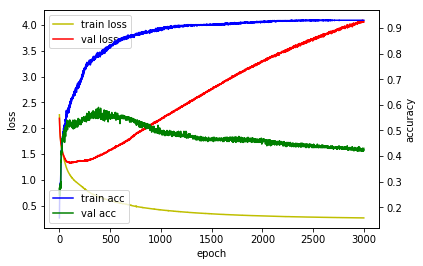

In [53]:
figs, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')

acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [54]:
res=model.evaluate(xTest, yTest, batch_size=32)
print("cost:"+str(res[0]))
print("accuracy:"+str(res[1]))

10000/10000 [==============================] - 0s 16us/step
cost:4.592044577789307
accuracy:0.44859999418258667


In [55]:
#조기 종료 : earlystopping
#콜백(함수):어떤 상황이 되었을때(val loss가 떨어지다가 올라가기 시작한 시점) 함수 내에서
#또 다른 어떤 함수를 호출하는 것

In [71]:
from keras.callbacks import EarlyStopping

In [72]:
es=EarlyStopping()

In [73]:
hist=model.fit(xTrain,yTrain,epochs=3000, batch_size=10, validation_data=(xVal,yVal), callbacks=[es])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 229us/step - loss: 2.2820 - accuracy: 0.1100 - val_loss: 2.2653 - val_accuracy: 0.0933
Epoch 2/3000
700/700 [==============================] - 0s 101us/step - loss: 2.2281 - accuracy: 0.1314 - val_loss: 2.2198 - val_accuracy: 0.0767
Epoch 3/3000
700/700 [==============================] - 0s 117us/step - loss: 2.1718 - accuracy: 0.1486 - val_loss: 2.1569 - val_accuracy: 0.1867
Epoch 4/3000
700/700 [==============================] - 0s 107us/step - loss: 2.1202 - accuracy: 0.1957 - val_loss: 2.1079 - val_accuracy: 0.2200
Epoch 5/3000
700/700 [==============================] - 0s 99us/step - loss: 2.0770 - accuracy: 0.2129 - val_loss: 2.0673 - val_accuracy: 0.2233
Epoch 6/3000
700/700 [==============================] - 0s 104us/step - loss: 2.0413 - accuracy: 0.2314 - val_loss: 2.0320 - val_accuracy: 0.2267
Epoch 7/3000
700/700 [==============================] - 0s 96us/step - loss: 2.

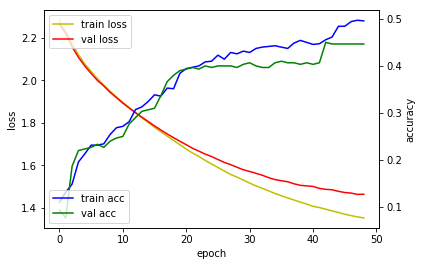

In [74]:
figs, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')

acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [60]:
es=EarlyStopping(patience=30)

In [61]:
hist=model.fit(xTrain,yTrain,epochs=3000, batch_size=10, validation_data=(xVal,yVal), callbacks=[es])

Train on 700 samples, validate on 300 samples
Epoch 1/3000
700/700 [==============================] - 0s 120us/step - loss: 0.2635 - accuracy: 0.9300 - val_loss: 4.0938 - val_accuracy: 0.4200
Epoch 2/3000
700/700 [==============================] - 0s 107us/step - loss: 0.2637 - accuracy: 0.9300 - val_loss: 4.1007 - val_accuracy: 0.4233
Epoch 3/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2632 - accuracy: 0.9300 - val_loss: 4.0811 - val_accuracy: 0.4200
Epoch 4/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2635 - accuracy: 0.9300 - val_loss: 4.0759 - val_accuracy: 0.4267
Epoch 5/3000
700/700 [==============================] - 0s 104us/step - loss: 0.2637 - accuracy: 0.9300 - val_loss: 4.1015 - val_accuracy: 0.4233
Epoch 6/3000
700/700 [==============================] - 0s 96us/step - loss: 0.2638 - accuracy: 0.9300 - val_loss: 4.0835 - val_accuracy: 0.4200
Epoch 7/3000
700/700 [==============================] - 0s 107us/step - loss: 0.

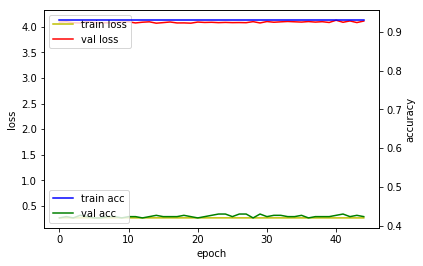

In [62]:
figs, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()
loss_ax.plot(hist.history['loss'],'y',label='train loss')
loss_ax.plot(hist.history['val_loss'],'r',label='val loss')

acc_ax.plot(hist.history['accuracy'],'b',label='train acc')
acc_ax.plot(hist.history['val_accuracy'],'g',label='val acc')

acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
plt.show()

In [75]:
import tensorflow as tf

In [76]:
seed=123
np.random.seed(seed)
tf.set_random_seed(seed)

In [77]:
dataset=np.loadtxt("ThoraricSurgery.csv", 
                   delimiter=",")

In [81]:
np.shape(dataset)

(470, 18)

In [82]:
x=dataset[:,0:17]
y=dataset[:,17] #1:수술 후 생존, 0: 사망

In [83]:
model=Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [84]:
model.compile(loss='mean_squared_error', 
              optimizer='adam', 
              metrics=['accuracy'])

In [85]:
model.fit(x,y,epochs=30, batch_size=10)

Epoch 1/30
470/470 [==============================] - 0s 515us/step - loss: 0.6513 - accuracy: 0.3213
Epoch 2/30
470/470 [==============================] - 0s 89us/step - loss: 0.1501 - accuracy: 0.8489
Epoch 3/30
470/470 [==============================] - 0s 83us/step - loss: 0.1485 - accuracy: 0.8511
Epoch 4/30
470/470 [==============================] - 0s 81us/step - loss: 0.1483 - accuracy: 0.8511
Epoch 5/30
470/470 [==============================] - 0s 87us/step - loss: 0.1489 - accuracy: 0.8511
Epoch 6/30
470/470 [==============================] - 0s 85us/step - loss: 0.1485 - accuracy: 0.8511
Epoch 7/30
470/470 [==============================] - 0s 94us/step - loss: 0.1490 - accuracy: 0.8511
Epoch 8/30
470/470 [==============================] - 0s 85us/step - loss: 0.1484 - accuracy: 0.8511
Epoch 9/30
470/470 [==============================] - 0s 85us/step - loss: 0.1482 - accuracy: 0.8511
Epoch 10/30
470/470 [==============================] - 0s 91us/step - loss: 0.1475 - accur

In [87]:
print(model.evaluate(x,y)[1])

470/470 [==============================] - 0s 21us/step
0.8510638475418091


In [88]:
xy=np.loadtxt('data-03-diabetes.csv', 
              delimiter=",")
xy

array([[-0.294118 ,  0.487437 ,  0.180328 , ..., -0.53117  , -0.0333333,
         0.       ],
       [-0.882353 , -0.145729 ,  0.0819672, ..., -0.766866 , -0.666667 ,
         1.       ],
       [-0.0588235,  0.839196 ,  0.0491803, ..., -0.492741 , -0.633333 ,
         0.       ],
       ...,
       [-0.411765 ,  0.21608  ,  0.180328 , ..., -0.857387 , -0.7      ,
         1.       ],
       [-0.882353 ,  0.266332 , -0.0163934, ..., -0.768574 , -0.133333 ,
         0.       ],
       [-0.882353 , -0.0653266,  0.147541 , ..., -0.797609 , -0.933333 ,
         1.       ]])

In [94]:
xdata=xy[:,0:-1]
#xdata
ydata=xy[:,[-1]]

In [95]:
print(xdata.shape, ydata.shape)

(759, 8) (759, 1)


In [96]:
w=tf.Variable(tf.random_normal([8,1]))
b=tf.Variable(tf.random_normal([1]))
x=tf.placeholder(tf.float32, shape=[None,8])
y=tf.placeholder(tf.float32, shape=[None,1])

In [98]:
hf=tf.sigmoid(tf.matmul(x,w)+b)
cost=-tf.reduce_mean(y*tf.log(hf)+
                     (1-y)*tf.log(1-hf))

In [99]:
train=tf.train.GradientDescentOptimizer(0.01).minimize(cost)

In [100]:
predicted=tf.cast(hf>0.5,dtype=tf.float32)
accuracy=tf.reduce_mean
(tf.cast(tf.equal(predicted,y),
         dtype=tf.float32))

In [103]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for step in range(10001):
        cv,_=sess.run([cost,train], 
                      feed_dict={x:xdata,y:ydata})
        if step%200==0:
            print(step,cv)
    hv,pv,av=sess.run([hf,predicted,accuracy],
                feed_dict={x:xdata,y:ydata})
    print(hv,pv,av)

0 1.1094863
200 0.70070773
400 0.6253061
600 0.60272974
800 0.58896494
1000 0.5776871
1200 0.5678035
1400 0.55902684
1600 0.5512095
1800 0.5442373
2000 0.5380113
2200 0.5324441
2400 0.5274585
2600 0.5229864
2800 0.51896805
3000 0.5153508
3200 0.5120884
3400 0.5091406
3600 0.50647193
3800 0.50405127
4000 0.5018512
4200 0.49984777
4400 0.49802014
4600 0.49634963
4800 0.49482006
5000 0.49341685
5200 0.49212742
5400 0.49094054
5600 0.4898462
5800 0.4888355
6000 0.48790073
6200 0.4870347
6400 0.4862313
6600 0.4854849
6800 0.48479035
7000 0.48414344
7200 0.48353997
7400 0.4829763
7600 0.48244908
7800 0.48195556
8000 0.4814931
8200 0.48105904
8400 0.4806513
8600 0.48026788
8800 0.47990698
9000 0.47956702
9200 0.47924632
9400 0.47894365
9600 0.4786577
9800 0.4783873
10000 0.4781314
[[0.43820193]
 [0.93581176]
 [0.25459132]
 [0.9514966 ]
 [0.2126536 ]
 [0.7686801 ]
 [0.94086003]
 [0.5619235 ]
 [0.26697546]
 [0.52510595]
 [0.6610118 ]
 [0.15458795]
 [0.33936924]
 [0.34252465]
 [0.7545746 ]
 [0.3